In [21]:
#import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report



In [11]:
#load dataset
df=pd.read_csv('creditcard.csv')
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

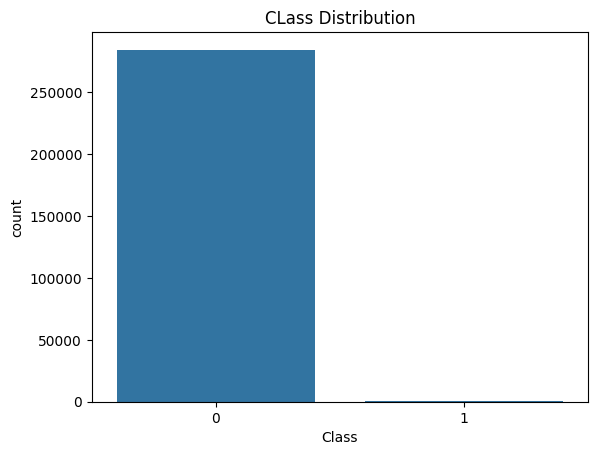

In [13]:
sns.countplot(x='Class',data=df)
plt.title("CLass Distribution")
plt.show()

In [14]:
#scaling
standardscaling=StandardScaler()
df['Amount']=standardscaling.fit_transform(df[['Amount']])

In [15]:
X = df.drop('Class', axis=1)
y = df['Class']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [18]:
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


Random Forest Results
[[56861     3]
 [   25    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.952908497036969


In [20]:
base_estimator = DecisionTreeClassifier(max_depth=1)

ada = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

ada.fit(X_train, y_train)


,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,100
,learning_rate,0.5
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [23]:
y_pred_ada = ada.predict(X_test)

print("AdaBoost Results")
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))
print("ROC-AUC:", roc_auc_score(y_test, ada.predict_proba(X_test)[:,1]))


AdaBoost Results
[[56841    23]
 [   31    67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.68      0.71        98

    accuracy                           1.00     56962
   macro avg       0.87      0.84      0.86     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9769651793609959


In [24]:
importances = rf.feature_importances_
features = X.columns

imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

imp_df.head(10)


,Feature,Importance
14,V14,0.179857
10,V10,0.115442
12,V12,0.096206
4,V4,0.095646
17,V17,0.095113
3,V3,0.068669
11,V11,0.056112
16,V16,0.040303
2,V2,0.036265
9,V9,0.026888


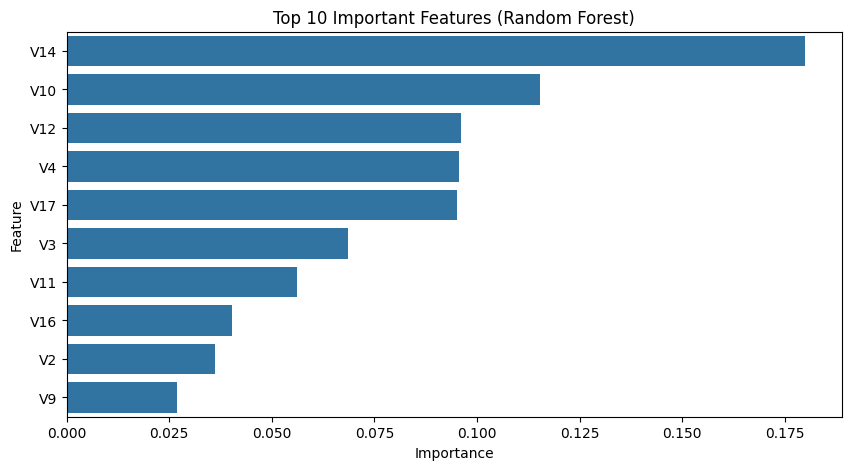

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=imp_df.head(10))
plt.title("Top 10 Important Features (Random Forest)")
plt.show()
